In [1]:
# Install YOLOv8 and dependencies
!pip install ultralytics
!pip install kaggle
!pip install opencv-python pillow matplotlib tqdm

# Verify installation
import ultralytics
ultralytics.checks()


Ultralytics 8.3.69  Python-3.12.1 torch-2.5.1+cpu CPU (Intel Core(TM) i7-9750HF 2.60GHz)
Setup complete  (12 CPUs, 15.9 GB RAM, 210.8/236.3 GB disk)


In [2]:
import os
import shutil

# Define the path
kaggle_path = os.path.expanduser("~/.kaggle")

# Create the folder if it doesn't exist
os.makedirs(kaggle_path, exist_ok=True)

# Move kaggle.json (assuming it's in your current directory)
shutil.move("kaggle.json", os.path.join(kaggle_path, "kaggle.json"))

# Set correct permissions
os.chmod(os.path.join(kaggle_path, "kaggle.json"), 0o600)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
!kaggle datasets download -d henningheyen/lvis-fruits-and-vegetables-dataset/

In [3]:
from ultralytics import YOLO
model = YOLO('./best_model.pt')  # Ensure correct path
print("hi")

hi



image 1/1 C:\Users\toufe\Downloads\Fruit&Vegetables_Classficaitaion\Testing\testing.jpg: 512x640 7 bell pepper/capsicums, 1 lettuce, 1 mushroom, 3 onions, 14 tomatos, 186.6ms
Speed: 15.5ms preprocess, 186.6ms inference, 23.5ms postprocess per image at shape (1, 3, 512, 640)


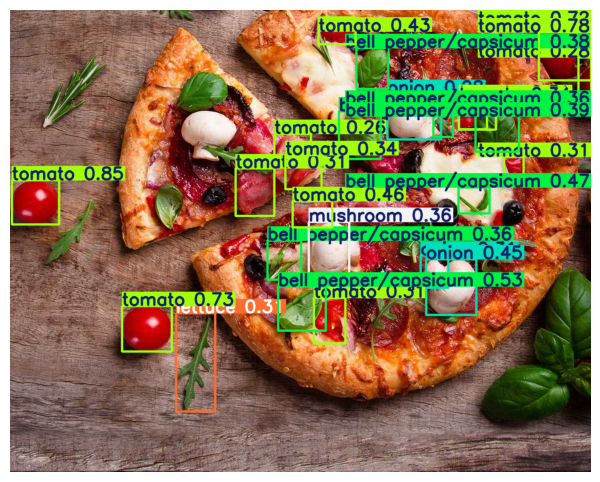

True

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLO model with custom weights
model = YOLO('./best_model.pt')  # Ensure path is correct

# Load the image
image_path = './Testing/testing.jpg'  # Update with correct image path

# Run inference
results = model(image_path)

# Iterate over results and display bounding boxes
for result in results:
    # Convert the result to an image with bounding boxes
    annotated_img = result.plot()

    # Convert from BGR (OpenCV) to RGB (Matplotlib format)
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis("off")  # Hide axes
    plt.show()

# Optionally, save the output image with detections
cv2.imwrite("./testing_with_detections.jpg", annotated_img)
